<a href="https://colab.research.google.com/github/DinaZakaria/AFLW2000_HeadPose/blob/master/03_Training_and_Testing_V02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.metrics import r2_score

In [ ]:
plt.style.use(['ggplot'])

# 12. Machine learning techniques

In [ ]:
import random as rd
rd.seed(0)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 12.1 Loading and exploring the dataset

First, we use pandas to load the dataset from a csv file.

In [ ]:
# use pabdas to read './titanic.csv'
# raw_data = pd.read_csv('AFLW2000_CSV_Original.csv', sep = ',')
raw_data = pd.read_csv('AFLW2000_CSV_nose_chin_2.csv', sep = ',')
raw_data

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,-1.091282,-1.086000,-1.038936,-0.996514,-0.925771,-0.809490,-0.671983,-0.446277,-0.117864,0.242286,...,0.299680,0.332294,0.352098,0.429039,0.519759,0.516972,0.455673,-0.399231,0.018227,0.085676
1,1.111359,1.065791,1.037010,0.974442,0.837279,0.640687,0.416669,0.230186,0.244669,0.467910,...,0.476117,0.448424,0.440669,0.478069,0.433939,0.446953,0.466681,0.470065,1.189533,0.300959
2,0.454202,0.486088,0.524265,0.540191,0.527233,0.478943,0.410866,0.372253,0.475943,0.711926,...,0.332108,0.329334,0.321050,0.302267,0.336187,0.349787,0.349212,-0.184650,0.881137,-0.236852
3,-0.517121,-0.414664,-0.277493,-0.163534,-0.051607,0.062481,0.153905,0.291484,0.545762,0.794845,...,0.344654,0.315320,0.288107,0.181159,0.345453,0.387353,0.401610,-0.175379,0.299208,-0.373374
4,1.001988,1.065856,1.128360,1.162676,1.145152,1.066049,0.919178,0.759589,0.717417,0.820857,...,0.229622,0.231534,0.215880,0.259009,0.274290,0.287105,0.278990,-0.882169,1.198004,-1.033374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.252641,-1.239865,-1.182042,-1.117822,-1.030085,-0.897815,-0.728181,-0.498829,-0.180936,0.134234,...,0.396641,0.403502,0.419986,0.438852,0.476606,0.475369,0.449660,-0.197102,-0.070430,0.105118
1996,-1.472311,-1.449088,-1.433647,-1.385559,-1.261200,-1.037717,-0.770335,-0.544143,-0.436020,-0.484633,...,0.368444,0.359982,0.354280,0.368578,0.368870,0.377510,0.379770,-0.232617,-1.418751,0.175960
1997,1.081796,1.095867,1.108672,1.100759,1.043512,0.914471,0.749263,0.583884,0.509112,0.578280,...,0.304870,0.309029,0.312214,0.353416,0.334996,0.338135,0.323728,-1.447955,1.431267,-1.509418
1998,-1.340094,-1.344059,-1.334643,-1.321759,-1.267096,-1.114157,-0.915139,-0.704839,-0.562029,-0.552836,...,0.332378,0.338509,0.339106,0.359214,0.361742,0.364145,0.354171,-0.420465,-1.191176,0.451515


## All Features

In [ ]:
X = raw_data.iloc[:,0:136].to_numpy()

## 6 * 2 (12) Selected Features

In [ ]:
y_shift = 68
xy_list = ["8", "30", "36", "45", "48", "54", str(8 + y_shift), str(30+ y_shift), str(36+ y_shift), str(45+ y_shift), str(48+ y_shift), str(54+ y_shift)]

In [ ]:
X = raw_data[xy_list]
X

,8,30,36,45,48,54,76,98,104,113,116,122
0,-0.117864,0.0,-0.660870,0.811568,-0.471326,0.388258,0.993030,0.0,-0.868580,-0.734130,0.247089,0.431947
1,0.244669,0.0,0.390942,0.818068,0.240005,0.475098,0.969607,0.0,-0.268480,-0.445271,0.578156,0.481578
2,0.475943,0.0,0.029326,0.663393,0.186035,0.639567,0.879476,0.0,-0.389183,-0.480418,0.351012,0.307038
3,0.545762,0.0,-0.534558,0.548172,-0.038727,0.562913,0.837940,0.0,-0.411924,-0.792250,0.351042,0.173244
4,0.717417,0.0,0.251543,0.403701,0.469008,0.526977,0.696644,0.0,-0.364394,-0.518721,0.279280,0.265331
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.180936,0.0,-0.716524,0.705470,-0.476342,0.213887,0.983495,0.0,-0.767013,-0.644086,0.375926,0.443375
1996,-0.436020,0.0,-0.586483,-0.431478,-0.418666,-0.367536,0.899937,0.0,-0.403517,-0.460230,0.417412,0.370264
1997,0.509112,0.0,0.315109,0.329809,0.414839,0.353091,0.860700,0.0,-0.362887,-0.402392,0.316205,0.360906
1998,-0.562029,0.0,-0.556864,-0.261912,-0.576792,-0.366923,0.827117,0.0,-0.427689,-0.381033,0.337665,0.365449


In [ ]:
#pitch, yaw, roll
p = raw_data[["136"]].to_numpy()
y = raw_data[["137"]].to_numpy()
r = raw_data[["138"]].to_numpy()

Next, we can explore the dataset.

In [ ]:
X.shape

(2000, 12)

In [ ]:
X.shape[0]

2000

In [ ]:
X.shape[1]

12

In [ ]:
# Use pandas to examine some info of the dataset
raw_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 139 entries, 0 to 138
dtypes: float64(139)
memory usage: 2.1 MB


In [ ]:
# Use pandas to examine the description of the dataset
raw_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,-0.755232,-0.731983,-0.686050,-0.640433,-0.575223,-0.471651,-0.353945,-0.202407,0.023510,0.248397,...,0.351283,0.349111,0.349352,0.366970,0.422915,0.432049,0.421719,-0.107145,0.014077,-0.034479
std,0.782530,0.769068,0.758743,0.739557,0.690143,0.597327,0.483551,0.383559,0.343431,0.380917,...,0.067504,0.061186,0.068736,0.115665,0.075345,0.072397,0.074347,0.628119,0.654185,0.716014
min,-3.169890,-2.600180,-2.247002,-2.156541,-1.979221,-1.647210,-1.357087,-1.145315,-0.988148,-0.991923,...,-0.315574,-0.199487,-0.176575,-0.584151,-0.152882,-0.260228,-0.382177,-12.457202,-6.130066,-16.969362
25%,-1.346902,-1.323896,-1.273335,-1.221318,-1.115128,-0.936380,-0.730467,-0.491613,-0.225987,0.004216,...,0.316552,0.316664,0.312843,0.305122,0.386140,0.394719,0.385037,-0.258503,-0.294246,-0.174806
50%,-0.951520,-0.917664,-0.860382,-0.807823,-0.720739,-0.583298,-0.442983,-0.250704,0.026907,0.308737,...,0.359513,0.355493,0.358734,0.380160,0.428901,0.437636,0.428072,-0.122268,0.019702,-0.018098
75%,-0.378816,-0.345296,-0.303584,-0.243909,-0.191279,-0.102777,-0.037159,0.054989,0.267866,0.524930,...,0.397908,0.390865,0.396449,0.440148,0.466681,0.473515,0.464629,0.040192,0.334715,0.134378
max,1.430376,1.413885,1.519769,1.574971,1.547550,1.418249,1.200278,1.008586,0.977537,1.037080,...,0.544504,0.532746,0.550865,0.661585,0.741273,0.762734,0.731805,15.598820,3.277500,5.829394


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f596757d2d0>,
      dtype=object)

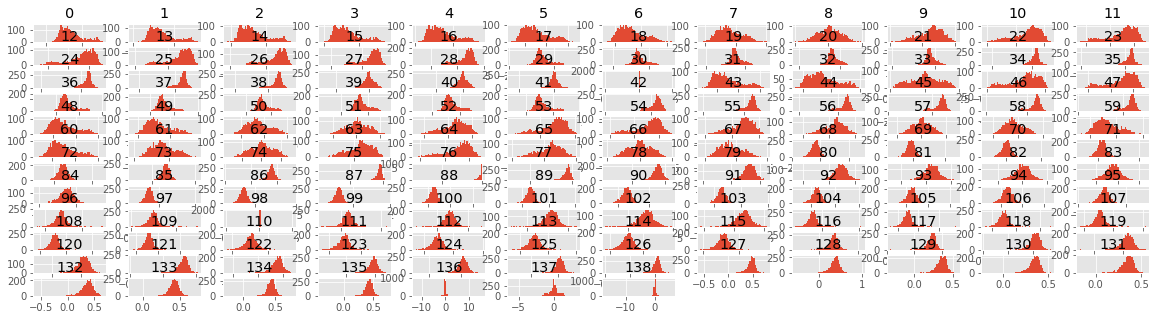

In [ ]:
# Use pandas to examine the histograms of the dataset columns
raw_data.hist(bins = 50, figsize = (20, 5))

### 12.3.4 Feature selection

#### 6 * 2 (12) Selected Features

In [ ]:
# preprocessed_data.head()

In [ ]:
y_shift = 68
xy_list = ["8", "30", "36", "45", "48", "54", str(8 + y_shift), str(30+ y_shift), str(36+ y_shift), str(45+ y_shift), str(48+ y_shift), str(54+ y_shift)]

In [ ]:
X = raw_data[xy_list]
X

,8,30,36,45,48,54,76,98,104,113,116,122
0,-0.117864,0.0,-0.660870,0.811568,-0.471326,0.388258,0.993030,0.0,-0.868580,-0.734130,0.247089,0.431947
1,0.244669,0.0,0.390942,0.818068,0.240005,0.475098,0.969607,0.0,-0.268480,-0.445271,0.578156,0.481578
2,0.475943,0.0,0.029326,0.663393,0.186035,0.639567,0.879476,0.0,-0.389183,-0.480418,0.351012,0.307038
3,0.545762,0.0,-0.534558,0.548172,-0.038727,0.562913,0.837940,0.0,-0.411924,-0.792250,0.351042,0.173244
4,0.717417,0.0,0.251543,0.403701,0.469008,0.526977,0.696644,0.0,-0.364394,-0.518721,0.279280,0.265331
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-0.180936,0.0,-0.716524,0.705470,-0.476342,0.213887,0.983495,0.0,-0.767013,-0.644086,0.375926,0.443375
1996,-0.436020,0.0,-0.586483,-0.431478,-0.418666,-0.367536,0.899937,0.0,-0.403517,-0.460230,0.417412,0.370264
1997,0.509112,0.0,0.315109,0.329809,0.414839,0.353091,0.860700,0.0,-0.362887,-0.402392,0.316205,0.360906
1998,-0.562029,0.0,-0.556864,-0.261912,-0.576792,-0.366923,0.827117,0.0,-0.427689,-0.381033,0.337665,0.365449


Next, we can explore the dataset.

In [ ]:
X.shape

(2000, 12)

In [ ]:
X.shape[0]

2000

In [ ]:
X.shape[1]

12

### 12.3.5 Saving for future use

In [ ]:
#preprocessed_data.to_csv('./preprocessed_titanic_data.csv', index=None)

# 12.4 Training models

### 12.4.1 Features-labels split and train-validation split

In [ ]:
features = raw_data[xy_list]
#features = raw_data.iloc[:,0:136].to_numpy()

In [ ]:
#pitch, yaw, roll
# p = data[["136"]].to_numpy()
labels = raw_data[["138"]].to_numpy()
# y = raw_data[["137"]].to_numpy()
# r = raw_data[["138"]].to_numpy()

In [ ]:
# # drop ["Survived"] column and save that to features
# features = data.drop(["Survived"], axis = 1)
#
# # save the ["Survived"] column to labels
# labels = data["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# split data by 60% train ; use random_state=100
features_train, features_validation_test, labels_train, labels_validation_test = train_test_split(features, labels, test_size = 0.4, random_state=100)

In [ ]:
# split test data by 50% validation and 50% test ; use random_state=100
features_validation, features_test, labels_validation, labels_test = train_test_split(features_validation_test, labels_validation_test, test_size = 0.5, random_state=42)

In [ ]:
print(len(features_train))
print(len(features_validation))
print(len(features_test))
print(len(labels_train))
print(len(labels_validation))
print(len(labels_test))

1200
400
400
1200
400
400


### 12.4.2 Training different models on our dataset

We'll train six models:
- Linear Regression
- Decision tree Regressor
- Support vector Regression (SVR)
- RandomForestRegressor
- GradientBoostingRegressor
- AdaBoostRegressor

In [ ]:
# Train linear regression model
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression().fit(features_train, labels_train)

In [ ]:
# Train decision tree model ; don't use any hyperparameter
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor().fit(features_train, labels_train)

In [ ]:
# Train SVM model ; don't use any hyperparameter
from sklearn.svm import SVR

svm_model = SVR().fit(features_train, labels_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Train random forest model ; don't use any hyperparameter
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor().fit(features_train, labels_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


In [ ]:
# Train gradient boosting model ; don't use any hyperparameter
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor().fit(features_train, labels_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Train Adaboost model ; don't use any hyperparameter
from sklearn.ensemble import AdaBoostRegressor

ab_model = AdaBoostRegressor().fit(features_train, labels_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Train Adaboost model ; don't use any hyperparameter
from sklearn.multioutput import MultiOutputRegressor
labels_train = raw_data.iloc[0:1200,136:140].to_numpy()
# ab_model = AdaBoostRegressor().fit(features_train, labels_train)
mor_model = MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(features_train, labels_train)
    # .predict(features_validation)

### 12.4.3 Evaluating the models

#### Accuracy

In [ ]:
# print accuracy of each model on validation data
print("Scores of the models")
print("Linear regression:", lr_model.score(features_validation,labels_validation))
print("Decision tree:", dt_model.score(features_validation,labels_validation))
print("SVR:", svm_model.score(features_validation,labels_validation))
print("Random forest:", rf_model.score(features_validation,labels_validation))
print("Gradient boosting:", gb_model.score(features_validation,labels_validation))
print("AdaBoost:", ab_model.score(features_validation,labels_validation))

Scores of the models
Linear regression: 0.9438886388660596
Decision tree: 0.9671890207690176
SVR: 0.9908945361824275
Random forest: 0.989286959894671
Gradient boosting: 0.9896649320699481
AdaBoost: 0.9674107016400567


In [ ]:
print("MultiOutputRegressor:", mor_model.score(features_validation,labels_validation))

ValueError: y_true and y_pred have different number of output (1!=3)

#### R2-score

In [ ]:
# print F1-score of each model on validation data
from sklearn.metrics import r2_score

print("R2-scores of the models:")
labels_predict = lr_model.predict(features_validation)
print("Linear regression:", r2_score(labels_validation, labels_predict))
labels_predict = dt_model.predict(features_validation)
print("Decision tree:", r2_score(labels_validation, labels_predict))
labels_predict = svm_model.predict(features_validation)
print("SVR:", r2_score(labels_validation, labels_predict))
labels_predict = rf_model.predict(features_validation)
print("Random forest:", r2_score(labels_validation, labels_predict))
labels_predict = gb_model.predict(features_validation)
print("Gradient boosting:", r2_score(labels_validation, labels_predict))
labels_predict = ab_model.predict(features_validation)
print("AdaBoost:", r2_score(labels_validation, labels_predict))

R2-scores of the models:
Linear regression: -0.19952146568111795
Decision tree: -2.370717934401864
SVR: 0.10480441239409277
Random forest: -0.6085018124714967
Gradient boosting: -0.9096131192438963
AdaBoost: -0.035297869553500894


### R2-score

In [ ]:
# r2score = r2_score(labels_validation, labels_predict, sample_weight=None, multioutput='uniform_average')
# r2score

### 12.4.4 Testing the model

Finding the accuracy and the F1-score of the model in the testing set.

In [ ]:
# print accuracy of gradient boost model on testing data
print("Scores of the models")
print("Linear regression:", lr_model.score(features_test,labels_test))
print("Decision tree:", dt_model.score(features_test,labels_test))
print("SVR:", svm_model.score(features_test,labels_test))
print("Random forest:", rf_model.score(features_test,labels_test))
print("Gradient boosting:", gb_model.score(features_test,labels_test))
print("AdaBoost:", ab_model.score(features_test,labels_test))


Scores of the models
Linear regression: 0.7108522661047507
Decision tree: 0.5224516723031557
SVR: 0.7533826323473077
Random forest: 0.7240752333542174
Gradient boosting: 0.7365860192351068
AdaBoost: 0.6640291293259952


In [ ]:
print("MultiOutputRegressor:", mor_model.score(features_test,labels_test))

ValueError: y_true and y_pred have different number of output (1!=3)

In [ ]:
# print F1-score of gradient boost model on testing data
print("F1-scores of the models:")
labels_predict = lr_model.predict(features_test)
print("Linear regression:", f1_score(labels_test, labels_predict))
labels_predict = dt_model.predict(features_test)
print("Decision tree:", f1_score(labels_test, labels_predict))
labels_predict = svm_model.predict(features_test)
print("SVM:", f1_score(labels_test, labels_predict))
labels_predict = rf_model.predict(features_test)
print("Random forest:", f1_score(labels_test, labels_predict))
labels_predict = gb_model.predict(features_test)
print("Gradient boosting:", f1_score(labels_test, labels_predict))
labels_predict = ab_model.predict(features_test)
print("AdaBoost:", f1_score(labels_test, labels_predict))

F1-scores of the models:


NameError: name 'f1_score' is not defined

# 12.5 Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
# CV -> Cross validation

In [ ]:
svm_parameters = {'kernel': ['rbf'],
                  'C': [0.00001, 0.0005, 0.0001, 0.005, 0.001, 0.01, 0.1, 1 , 10, 50 ,100],
                  'gamma': [0.00001, 0.0005, 0.0001, 0.005, 0.001, 0.01, 0.1, 1 , 10, 50 ,100]
                }
# use gridsearch to find the best hyperparameters 
svm = SVR()
svm_gs = GridSearchCV(estimator = svm, param_grid = svm_parameters)

svm_gs.fit(features_train, np.ravel(labels_train))
# git the best model 
svm_winner = svm_gs.best_estimator_
svm_winner

svm_winner.score(features_validation, labels_validation)

0.6189654392139047

In [ ]:
svm_winner

SVR(C=50, gamma=1e-05)

# 12.6 Cross validation

In [ ]:
# print the k-fold cross validation output
svm_gs.cv_results_

{'mean_fit_time': array([0.05192423, 0.05552797, 0.11294394, 0.07624984, 0.05362787,
        0.08500457, 0.0918818 , 0.0911211 , 0.08886089, 0.08854189,
        0.08902335, 0.04861059, 0.05252037, 0.05182009, 0.0736475 ,
        0.05201273, 0.06732144, 0.06741934, 0.06679621, 0.06701655,
        0.06491923, 0.06758389, 0.03951039, 0.04225998, 0.03755021,
        0.05570354, 0.04211044, 0.0611618 , 0.06484876, 0.06654816,
        0.06730332, 0.06630135, 0.06471848, 0.02440987, 0.0392086 ,
        0.03519092, 0.05503874, 0.04131393, 0.06261997, 0.06801348,
        0.06543641, 0.06375866, 0.06716695, 0.06832628, 0.03400517,
        0.04132209, 0.03760705, 0.05652719, 0.04341707, 0.06544628,
        0.06783042, 0.06571741, 0.06956148, 0.06748595, 0.06640873,
        0.02344017, 0.04020495, 0.03260674, 0.05327444, 0.04320707,
        0.06161575, 0.0688148 , 0.06702003, 0.06822028, 0.06731205,
        0.06851916, 0.01040206, 0.03960915, 0.02340899, 0.05761561,
        0.04301786, 0.06351471,

# 12.7 Save the model

In [ ]:
# use joblib to save the model
import joblib

joblib.dump(svm_winner, "svm_model.pkl")

# Later 
# my_model_loaded = joblib.load("svm_model.pkl")

['svm_model.pkl']

In [ ]:
# use joblib to save the model
import joblib

# joblib.dump(gb_model, "gb_model.pkl")

# joblib.dump(svm_model, "svm_model_p.pkl")
joblib.dump(dt_model, "dt_model_p.pkl")


# Later
# my_model_loaded = joblib.load("svm_model.pkl")

['dt_model_p.pkl']